In [92]:
import pandas as pd 

# Importando o arquivo CSV que foi retirado do site: https://economiapopular.com.br/#combustivel
gasolina = pd.read_csv('Data/combustiveis-brasil.csv')

# Precisamos converter a coluna 'referencia' em um objeto datatime
gasolina['referencia'] = pd.to_datetime(gasolina['referencia'], format='%Y-%m-%d')

# O nosso dataframe possui diversas colunas que não são interessantes para essa análise, então vou selecionar somente o preço médio, mínimo e máximo.
gasolina = gasolina[['referencia', 'gasolina_comum_preco_revenda_avg', 'gasolina_comum_preco_revenda_min','gasolina_comum_preco_revenda_max' ]]

# Vamos utilizar a coluna 'referecia' como indice do dataframe, pois queremos os valores por ano
gasolina.set_index('referencia', inplace=True)



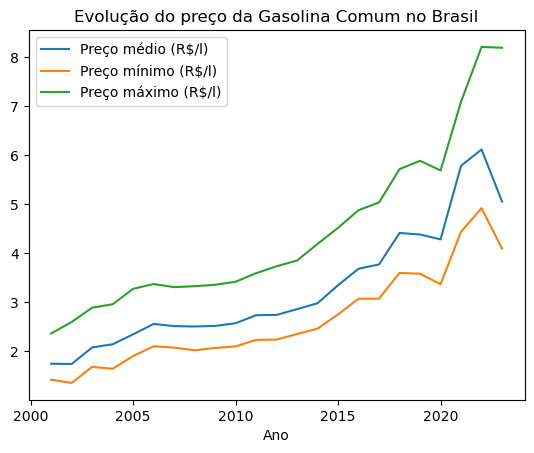

In [93]:
# criando o gráfico da evolução do preço da gasolina no Brasil utilizando a biblioteca Matplotlib

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# criando um Array com as 3 colunas que selecionamos
linhas = ['gasolina_comum_preco_revenda_avg', 'gasolina_comum_preco_revenda_min', 'gasolina_comum_preco_revenda_max']

# criando um Awway com o texto da legenda referente a cada coluna selecionada
rotulos = ['Preço médio (R$/l)', 'Preço mínimo (R$/l)', 'Preço máximo (R$/l)']


# Utilizaremos um FOR para percorrer nossos Arrays e plotar as colunas nas linhas com as suas respectivas legendas
for i in range(len(linhas)):
        plt.plot(gasolina_ano.index.year, gasolina_ano[linhas[i]], label=rotulos[i])

    
# Aqui definimos os títulos do nosso gráfico, dos eixos e utilizamos a legenda
plt.title('Evolução do preço da Gasolina Comum no Brasil')
plt.xlabel('Ano')
plt.legend()

# Exibe o gráfico
plt.show()



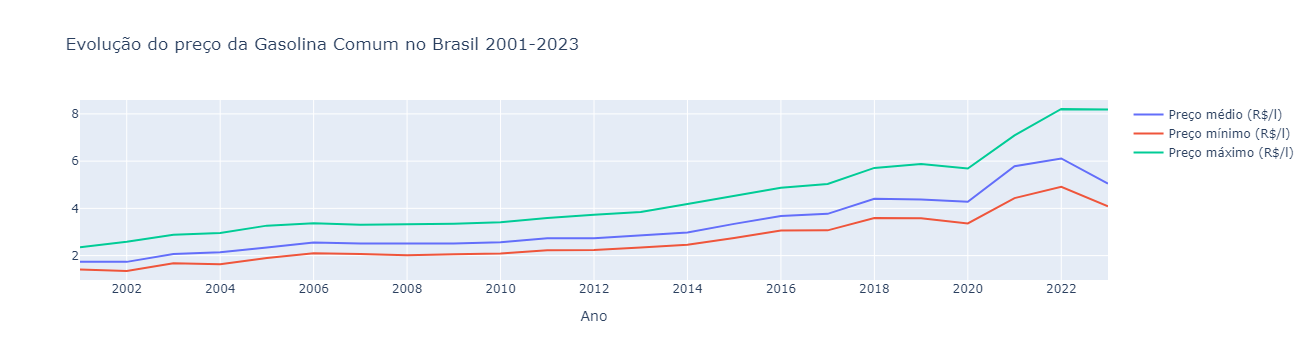

In [89]:
# criando o gráfico da evolução do preço da gasolina no Brasil utilizando a biblioteca Plotly
import plotly.graph_objs as go


# Criando um objeto do tipo Figure
fig = go.Figure()

# Criando um array com as colunas que vamos utilizar no gráfico
colunas = ['gasolina_comum_preco_revenda_avg', 'gasolina_comum_preco_revenda_min', 'gasolina_comum_preco_revenda_max']

# Criando um array com os nomes das legendas 
legendas = ['Preço médio (R$/l)', 'Preço mínimo (R$/l)', 'Preço máximo (R$/l)']

# Utilizaremos um FOR para percorrer nossos Arrays e plotar as colunas nas linhas com as suas respectivas legendas
for i in range(len(colunas)):
    fig.add_trace(go.Scatter(
        x=gasolina_ano.index.year,
        y=gasolina_ano[colunas[i]],
        mode='lines',
        name=legendas[i]
    ))

# Aqui definimos os títulos do nosso gráfico e dos eixos
fig.update_layout(
    title='Evolução do preço da Gasolina Comum no Brasil',
    xaxis_title='Ano',
    xaxis=dict(tickmode='linear', dtick=2) #com o parâmetro 'dtick' é possível definir o espaçamento entre os anos exibidos: 1 (todos os anos), 2(de 2 em 2 anos) etc.
)

# Exibe o gráfico
fig.show()
